In [1]:
# simple linear regression
# general goal is to find the line that best represents the real data with a linear line
# here we will try to find the closest formula of a straight line.
# here we will go over the distance of each point to the line and the amount of error is the distance of the point to the line
# we analyze the data and decide whether to use this model or not, the movement of the data we will predict is very important here

In [110]:
import numpy as np
import pandas as pd
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures #Polinomal regresyon yapmamızı sağlayacak !!!
import statsmodels.api as sm

In [3]:
veriler = pd.read_csv("satislar.csv")
veriler.head()

,Aylar,Satislar
0,8,19671.5
1,10,23102.5
2,11,18865.5
3,13,21762.5
4,14,19945.5


In [4]:
# Let's divide the 2 columns we have now
aylar = veriler[["Aylar"]] # months independent variable
aylar.head() 

,Aylar
0,8
1,10
2,11
3,13
4,14


In [5]:
satislar = veriler[["Satislar"]] # Sales are the month dependent variable.
satislar.head() 

,Satislar
0,19671.5
1,23102.5
2,18865.5
3,21762.5
4,19945.5


In [8]:
x_train,x_test,y_train,y_test=train_test_split(aylar,satislar,test_size=0.33,random_state=0)

In [9]:
#splitting the dataset

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [10]:
X_train=sc.fit_transform(x_train) #we made sc we combined worlds
X_test=sc.fit_transform(x_test)
Y_train=sc.fit_transform(y_train)
Y_test=sc.fit_transform(y_test)

In [15]:
# now we are creating the model so we need to import the model related libraries
# we will use prediction algorithms

# model building

#***************----------------Linear Regression --------------*************
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [17]:
lr.fit(X_train,Y_train) # fit function will try to build the model will train
# Will guess Y_train data from X_train

LinearRegression()

In [18]:
# let's apply the model
tahmin = lr.predict(X_test)

In [19]:
tahmin

array([[-1.33324088],
       [ 1.05398097],
       [-0.65761206],
       [-0.70265398],
       [ 0.82877136],
       [ 0.60356175],
       [ 0.82877136],
       [-0.70265398],
       [-0.29727668],
       [ 0.37835214]])

In [20]:
Y_test #real values
#It may not be very meaningful because we use it as scale, we can look at it when we remove it

array([[-1.66597621],
       [ 1.25819492],
       [-0.99762385],
       [-0.7856508 ],
       [ 1.0709181 ],
       [ 0.81055426],
       [ 0.92122098],
       [-1.04207705],
       [-0.09933754],
       [ 0.52977719]])

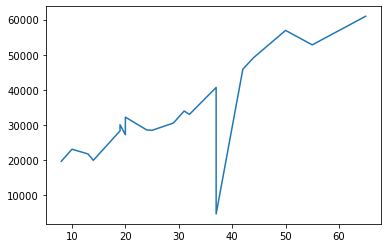

In [21]:
# let's make some comments by visualizing our data model
x_train=x_train.sort_index() # Sorting by index
y_train=y_train.sort_index()
plt.plot(x_train,y_train) # the order of our data is messy so we need to fix it

C:\Anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Text(0, 0.5, 'Satışlar')

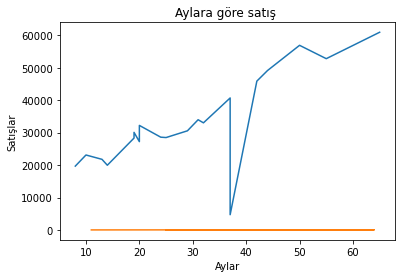

In [22]:
plt.plot(x_train,y_train)
plt.plot(x_test,lr.predict(x_test))
plt.title("Aylara göre satış ")
plt.xlabel("Aylar")
plt.ylabel("Satışlar")
# our linear regression algorithm calculates the orange line!!!

In [25]:
#***************----------------Multiple Linear Regression --------------*************
veriler = pd.read_csv("veriler.csv")
veriler.head()

,ulke,boy,kilo,yas,cinsiyet
0,tr,130,30,10,e
1,tr,125,36,11,e
2,tr,135,34,10,k
3,tr,133,30,9,k
4,tr,129,38,12,e


In [26]:
veriler.isnull().sum()

ulke        0
boy         0
kilo        0
yas         0
cinsiyet    0
dtype: int64

<AxesSubplot:>

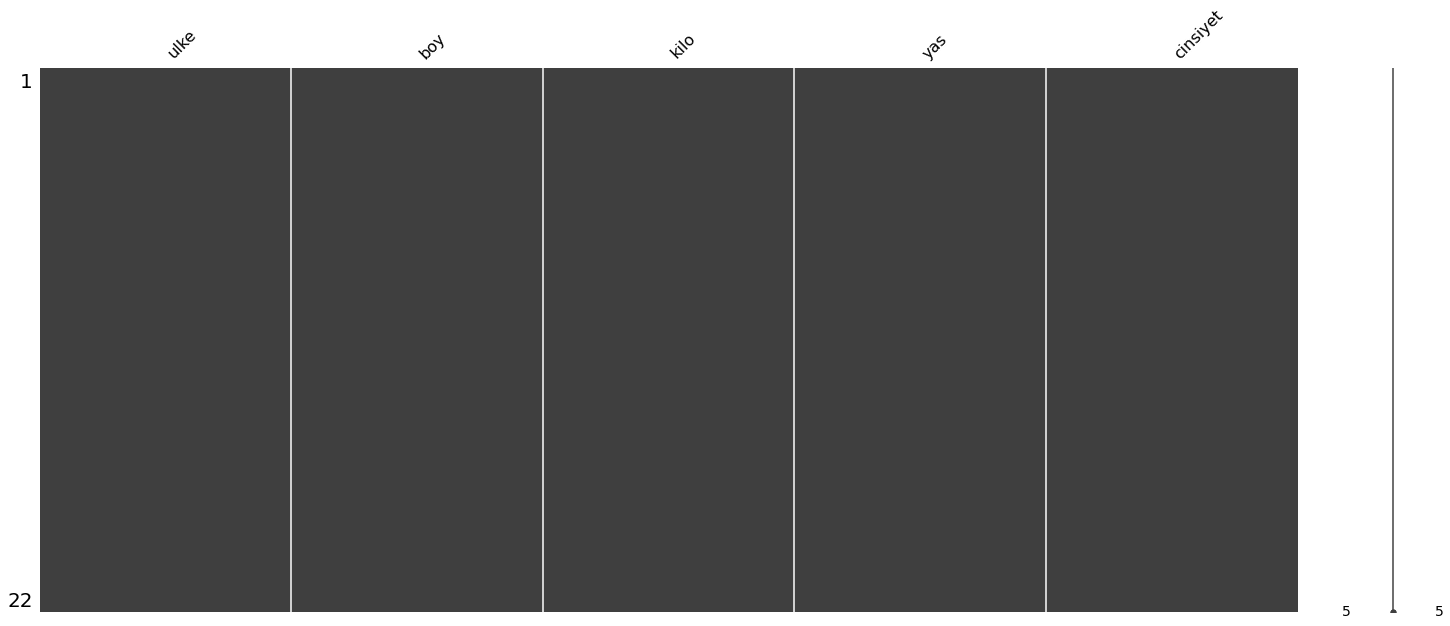

In [27]:
missingno.matrix(veriler)

In [28]:
ulke = veriler.iloc[:,0:1].values
ulke

array([['tr'],
       ['tr'],
       ['tr'],
       ['tr'],
       ['tr'],
       ['tr'],
       ['tr'],
       ['tr'],
       ['tr'],
       ['us'],
       ['us'],
       ['us'],
       ['us'],
       ['us'],
       ['us'],
       ['fr'],
       ['fr'],
       ['fr'],
       ['fr'],
       ['fr'],
       ['fr'],
       ['fr']], dtype=object)

In [30]:
le=preprocessing.LabelEncoder()
ulke[:,0]=le.fit_transform(veriler.iloc[:,0])
ulke

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=object)

In [31]:
ohe = preprocessing.OneHotEncoder()
ulke=ohe.fit_transform(ulke).toarray()
ulke

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [32]:
c=veriler.iloc[:,-1:].values
c

array([['e'],
       ['e'],
       ['k'],
       ['k'],
       ['e'],
       ['e'],
       ['e'],
       ['e'],
       ['k'],
       ['e'],
       ['k'],
       ['k'],
       ['k'],
       ['k'],
       ['k'],
       ['e'],
       ['e'],
       ['e'],
       ['e'],
       ['k'],
       ['k'],
       ['k']], dtype=object)

In [33]:
c[:,-1]=le.fit_transform(veriler.iloc[:,-1])
c

array([[0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1]], dtype=object)

In [34]:
c=ohe.fit_transform(c).toarray()
c

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [35]:
veriler.shape

(22, 5)

In [36]:
sonuc=pd.DataFrame(data=ulke,index=range(22),columns=["fr","tr","us"])
sonuc.head()

,fr,tr,us
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0


In [37]:
Yas=veriler.iloc[:,1:4].values
Yas

array([[130,  30,  10],
       [125,  36,  11],
       [135,  34,  10],
       [133,  30,   9],
       [129,  38,  12],
       [180,  90,  30],
       [190,  80,  25],
       [175,  90,  35],
       [177,  60,  22],
       [185, 105,  33],
       [165,  55,  27],
       [155,  50,  44],
       [160,  58,  39],
       [162,  59,  41],
       [167,  62,  55],
       [174,  70,  47],
       [193,  90,  23],
       [187,  80,  27],
       [183,  88,  28],
       [159,  40,  29],
       [164,  66,  32],
       [166,  56,  42]], dtype=int64)

In [38]:
sonuc2=pd.DataFrame(data=Yas,index=range(22),columns=["boy","kilo","yas"])
sonuc2

,boy,kilo,yas
0,130,30,10
1,125,36,11
2,135,34,10
3,133,30,9
4,129,38,12
5,180,90,30
6,190,80,25
7,175,90,35
8,177,60,22
9,185,105,33


In [39]:
sonuc3=pd.DataFrame(data=c[:,:1],index=range(22),columns=["cinsiyet"])
sonuc3

,cinsiyet
0,1.0
1,1.0
2,0.0
3,0.0
4,1.0
5,1.0
6,1.0
7,1.0
8,0.0
9,1.0


In [40]:
s=pd.concat([sonuc,sonuc2],axis=1)
s

,fr,tr,us,boy,kilo,yas
0,0.0,1.0,0.0,130,30,10
1,0.0,1.0,0.0,125,36,11
2,0.0,1.0,0.0,135,34,10
3,0.0,1.0,0.0,133,30,9
4,0.0,1.0,0.0,129,38,12
5,0.0,1.0,0.0,180,90,30
6,0.0,1.0,0.0,190,80,25
7,0.0,1.0,0.0,175,90,35
8,0.0,1.0,0.0,177,60,22
9,0.0,0.0,1.0,185,105,33


In [41]:
s2=pd.concat([s,sonuc3],axis=1)
s2

,fr,tr,us,boy,kilo,yas,cinsiyet
0,0.0,1.0,0.0,130,30,10,1.0
1,0.0,1.0,0.0,125,36,11,1.0
2,0.0,1.0,0.0,135,34,10,0.0
3,0.0,1.0,0.0,133,30,9,0.0
4,0.0,1.0,0.0,129,38,12,1.0
5,0.0,1.0,0.0,180,90,30,1.0
6,0.0,1.0,0.0,190,80,25,1.0
7,0.0,1.0,0.0,175,90,35,1.0
8,0.0,1.0,0.0,177,60,22,0.0
9,0.0,0.0,1.0,185,105,33,1.0


In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(s,sonuc3,test_size=0.33,random_state=0)

In [43]:
x_train.head()

,fr,tr,us,boy,kilo,yas
8,0.0,1.0,0.0,177,60,22
6,0.0,1.0,0.0,190,80,25
16,1.0,0.0,0.0,193,90,23
4,0.0,1.0,0.0,129,38,12
2,0.0,1.0,0.0,135,34,10


In [44]:
y_train.head()

,cinsiyet
8,0.0
6,1.0
16,1.0
4,1.0
2,0.0


In [45]:
regressor = LinearRegression()

In [46]:
regressor.fit(x_train,y_train)

LinearRegression()

In [47]:
y_pred=regressor.predict(x_test)

In [48]:
y_pred

array([[ 0.98720204],
       [-0.12036863],
       [ 0.05009703],
       [ 0.07137418],
       [ 0.72473935],
       [ 0.64615044],
       [-0.03567453],
       [ 0.32612171]])

In [49]:
y_test
#örneklere göre 2 hatalı veri var 

,cinsiyet
20,0.0
10,0.0
14,0.0
13,0.0
1,1.0
21,0.0
11,0.0
19,0.0


In [50]:
s2

,fr,tr,us,boy,kilo,yas,cinsiyet
0,0.0,1.0,0.0,130,30,10,1.0
1,0.0,1.0,0.0,125,36,11,1.0
2,0.0,1.0,0.0,135,34,10,0.0
3,0.0,1.0,0.0,133,30,9,0.0
4,0.0,1.0,0.0,129,38,12,1.0
5,0.0,1.0,0.0,180,90,30,1.0
6,0.0,1.0,0.0,190,80,25,1.0
7,0.0,1.0,0.0,175,90,35,1.0
8,0.0,1.0,0.0,177,60,22,0.0
9,0.0,0.0,1.0,185,105,33,1.0


In [51]:
boy = s2.iloc[:,3:4].values
boy = pd.DataFrame(data=boy,index=range(22),columns=["boy"])

In [52]:
boy

,boy
0,130
1,125
2,135
3,133
4,129
5,180
6,190
7,175
8,177
9,185


In [53]:
sol = s2.iloc[:,:3].values
sag = s2.iloc[:,4:].values

In [54]:
sol

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [55]:
sag

array([[ 30.,  10.,   1.],
       [ 36.,  11.,   1.],
       [ 34.,  10.,   0.],
       [ 30.,   9.,   0.],
       [ 38.,  12.,   1.],
       [ 90.,  30.,   1.],
       [ 80.,  25.,   1.],
       [ 90.,  35.,   1.],
       [ 60.,  22.,   0.],
       [105.,  33.,   1.],
       [ 55.,  27.,   0.],
       [ 50.,  44.,   0.],
       [ 58.,  39.,   0.],
       [ 59.,  41.,   0.],
       [ 62.,  55.,   0.],
       [ 70.,  47.,   1.],
       [ 90.,  23.,   1.],
       [ 80.,  27.,   1.],
       [ 88.,  28.,   1.],
       [ 40.,  29.,   0.],
       [ 66.,  32.,   0.],
       [ 56.,  42.,   0.]])

In [56]:
veri = np.concatenate([sol, sag], axis=1)
veri_df = veri_df = pd.DataFrame(data=veri,index=range(22),columns=["fr","tr","us","kilo","yas","cinsiyet"])

In [57]:
veri_df

,fr,tr,us,kilo,yas,cinsiyet
0,0.0,1.0,0.0,30.0,10.0,1.0
1,0.0,1.0,0.0,36.0,11.0,1.0
2,0.0,1.0,0.0,34.0,10.0,0.0
3,0.0,1.0,0.0,30.0,9.0,0.0
4,0.0,1.0,0.0,38.0,12.0,1.0
5,0.0,1.0,0.0,90.0,30.0,1.0
6,0.0,1.0,0.0,80.0,25.0,1.0
7,0.0,1.0,0.0,90.0,35.0,1.0
8,0.0,1.0,0.0,60.0,22.0,0.0
9,0.0,0.0,1.0,105.0,33.0,1.0


In [58]:
s2

,fr,tr,us,boy,kilo,yas,cinsiyet
0,0.0,1.0,0.0,130,30,10,1.0
1,0.0,1.0,0.0,125,36,11,1.0
2,0.0,1.0,0.0,135,34,10,0.0
3,0.0,1.0,0.0,133,30,9,0.0
4,0.0,1.0,0.0,129,38,12,1.0
5,0.0,1.0,0.0,180,90,30,1.0
6,0.0,1.0,0.0,190,80,25,1.0
7,0.0,1.0,0.0,175,90,35,1.0
8,0.0,1.0,0.0,177,60,22,0.0
9,0.0,0.0,1.0,185,105,33,1.0


In [59]:
x_train,x_test,y_train,y_test=train_test_split(veri_df,boy,test_size=0.33,random_state=0)

In [60]:
x_train.head()

,fr,tr,us,kilo,yas,cinsiyet
8,0.0,1.0,0.0,60.0,22.0,0.0
6,0.0,1.0,0.0,80.0,25.0,1.0
16,1.0,0.0,0.0,90.0,23.0,1.0
4,0.0,1.0,0.0,38.0,12.0,1.0
2,0.0,1.0,0.0,34.0,10.0,0.0


In [61]:
y_train.head()

,boy
8,177
6,190
16,193
4,129
2,135


In [62]:
r2=LinearRegression()
r2.fit(x_train,y_train)

LinearRegression()

In [63]:
y_pred2 = r2.predict(x_test)
y_pred2 = pd.DataFrame(data=y_pred2,index=range(8),columns=["boy"])

In [64]:
y_pred2

,boy
0,182.266387
1,152.871615
2,162.793864
3,158.306686
4,130.828890
5,173.961384
6,150.127827
7,157.268989


In [65]:
y_test

,boy
20,164
10,165
14,167
13,162
1,125
21,166
11,155
19,159


In [66]:
#****************BackWard Elimination******************#
# This method is one of 5 different possible methods
# Let's review BackWard Elimination

veri_df.head()

,fr,tr,us,kilo,yas,cinsiyet
0,0.0,1.0,0.0,30.0,10.0,1.0
1,0.0,1.0,0.0,36.0,11.0,1.0
2,0.0,1.0,0.0,34.0,10.0,0.0
3,0.0,1.0,0.0,30.0,9.0,0.0
4,0.0,1.0,0.0,38.0,12.0,1.0


In [67]:
# in this lesson we will talk a little more about determining success criteria
# We will see how to calculate p-Value with python
# we are concerned with the success of the model and the variables in the model
# we can build a system
import statsmodels.api as sm

First, I put the variables into the system to build a model on my variables.
I will add
first we will add the variables and which of these variables will make the system more
very impressive we will see
my goal here is actually I'm going to create an array then put all the variables inside the array
I'll add it and then I'll go by eliminating the variables
that is, whichever variable disrupts the system more, its P-value is higher.
I will remove it from the system

In [68]:
# we will add a column between them because constant value is required from our formula
# we will add 1 to the column because we want the multiplier to be 1
# If B0 is 1, the multiplier is comfortable
X=np.append(arr=np.ones((22,1)).astype(int),values=veri_df,axis=1)

In [69]:
X

array([[  1.,   0.,   1.,   0.,  30.,  10.,   1.],
       [  1.,   0.,   1.,   0.,  36.,  11.,   1.],
       [  1.,   0.,   1.,   0.,  34.,  10.,   0.],
       [  1.,   0.,   1.,   0.,  30.,   9.,   0.],
       [  1.,   0.,   1.,   0.,  38.,  12.,   1.],
       [  1.,   0.,   1.,   0.,  90.,  30.,   1.],
       [  1.,   0.,   1.,   0.,  80.,  25.,   1.],
       [  1.,   0.,   1.,   0.,  90.,  35.,   1.],
       [  1.,   0.,   1.,   0.,  60.,  22.,   0.],
       [  1.,   0.,   0.,   1., 105.,  33.,   1.],
       [  1.,   0.,   0.,   1.,  55.,  27.,   0.],
       [  1.,   0.,   0.,   1.,  50.,  44.,   0.],
       [  1.,   0.,   0.,   1.,  58.,  39.,   0.],
       [  1.,   0.,   0.,   1.,  59.,  41.,   0.],
       [  1.,   0.,   0.,   1.,  62.,  55.,   0.],
       [  1.,   1.,   0.,   0.,  70.,  47.,   1.],
       [  1.,   1.,   0.,   0.,  90.,  23.,   1.],
       [  1.,   1.,   0.,   0.,  80.,  27.,   1.],
       [  1.,   1.,   0.,   0.,  88.,  28.,   1.],
       [  1.,   1.,   0.,   0.,

In [70]:
# we will create a list containing each data, then we will proceed by eliminating from this list
X_L =veri_df.iloc[:,[0,1,2,3,4,5]].values
X_L = np.array(X_L,dtype=float)

In [71]:
model=sm.OLS(boy,X_L).fit()

In [73]:
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    boy   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     24.69
Date:                Sun, 16 Jul 2023   Prob (F-statistic):           5.41e-07
Time:                        18:38:13   Log-Likelihood:                -73.950
No. Observations:                  22   AIC:                             159.9
Df Residuals:                      16   BIC:                             166.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           114.0688      8.145     14.005      0.000      96.802     131.335
x2           108.3030      5.736     18.880      0.000      96.143     120.463
x3           104.4714      9.195     11.361      0.000      84.978     123.964
x4             0.9211      0.119      7.737      0.000       0.669       1.174
x5             0.0814      0.221      0.369      0.717      -0.386       0.549
x6           -10.5980      5.052     -2.098      0.052     -21.308       0.112
==============================================================================
Omnibus:                        1.031   Durbin-Watson:                   2.759
Prob(Omnibus):                  0.597   Jarque-Bera (JB):                0.624
Skew:                           0.407   Prob(JB):                        0.732
Kurtosis:                       2.863   Cond. No.                         524.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

the dvalue that is important to us here is the P-value
The lower the P-value, the better for us.
There is a problem with x5 value, it is the highest value
Our aim is to eliminate the one with the highest P-value.
so starting from 0 we will eliminate the 4th element

In [74]:
#Now let's eliminate element 4 and try again
X_L =veri_df.iloc[:,[0,1,2,3,5]].values
X_L = np.array(X_L,dtype=float)
model=sm.OLS(boy,X_L).fit()
model.summary()
# 0.031 is an acceptable value be careful

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    boy   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     32.47
Date:                Sun, 16 Jul 2023   Prob (F-statistic):           9.32e-08
Time:                        18:39:07   Log-Likelihood:                -74.043
No. Observations:                  22   AIC:                             158.1
Df Residuals:                      17   BIC:                             163.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           115.6583      6.734     17.175      0.000     101.451     129.866
x2           109.0786      5.200     20.978      0.000      98.108     120.049
x3           106.5445      7.090     15.026      0.000      91.585     121.504
x4             0.9405      0.104      9.029      0.000       0.721       1.160
x5           -11.1093      4.733     -2.347      0.031     -21.096      -1.123
==============================================================================
Omnibus:                        0.871   Durbin-Watson:                   2.719
Prob(Omnibus):                  0.647   Jarque-Bera (JB):                0.459
Skew:                           0.351   Prob(JB):                        0.795
Kurtosis:                       2.910   Cond. No.                         397.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
#***************----------------polynomial regression --------------*************
df = pd.read_csv("maaslar.csv")
df.head()

,unvan,Egitim Seviyesi,maas
0,Cayci,1,2250
1,Sekreter,2,2500
2,Uzman Yardimcisi,3,3000
3,Uzman,4,4000
4,Proje Yoneticisi,5,5500


In [78]:
x=df.iloc[:,1:2]
y=df.iloc[:,2:]

In [79]:
x

,Egitim Seviyesi
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [80]:
y

,maas
0,2250
1,2500
2,3000
3,4000
4,5500
5,7500
6,10000
7,15000
8,25000
9,50000


In [82]:
lin_reg=LinearRegression()
lin_reg.fit(x,y)

LinearRegression()

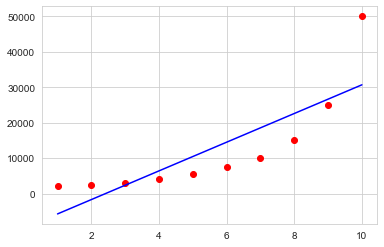

In [83]:
plt.scatter(x,y,color="red")
plt.plot(x,lin_reg.predict(x),color="blue")

In [84]:
poly_reg = PolynomialFeatures(degree = 2) 

In [85]:
x_poly=poly_reg.fit_transform(x)
x_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [86]:
lin_reg2=LinearRegression()
lin_reg2.fit(x_poly,y)

LinearRegression()

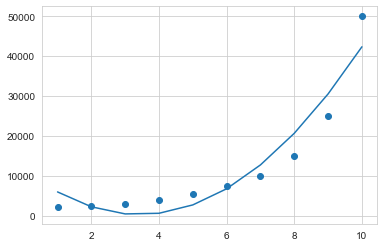

In [87]:
plt.scatter(x,y)
plt.plot(x,lin_reg2.predict(poly_reg.fit_transform(x))) #her bir değeri polynomil features'a dönüştürüyoruz bu işlemle 
plt.show()

In [88]:
lin_reg2

LinearRegression()

In [89]:
#4. dereceden yaptık 
poly_reg = PolynomialFeatures(degree = 4) 
x_poly=poly_reg.fit_transform(x)
x_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

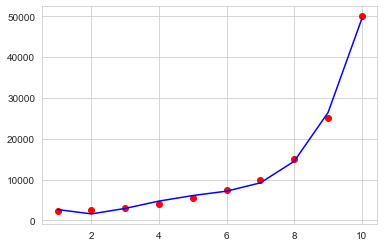

In [90]:
lin_reg2=LinearRegression()
lin_reg2.fit(x_poly,y)
plt.scatter(x,y,color="red")
plt.plot(x,lin_reg2.predict(poly_reg.fit_transform(x)),color="blue")
plt.show()

In [91]:
#tahminler
print(lin_reg.predict([[11]]))
print(lin_reg.predict([[6.6]]))

[[34716.66666667]]
[[16923.33333333]]


C:\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [92]:
print(lin_reg2.predict(poly_reg.fit_transform([[6.6]])))
print(lin_reg2.predict(poly_reg.fit_transform([[11]])))

[[8146.9948718]]
[[89041.66666667]]


In [93]:
#***************----------------SVR regression --------------*************
#data upload
df = pd.read_csv("maaslar.csv")
#DataFrame(slice)
x=df.iloc[:,1:2] 
y=df.iloc[:,2:]
#Creating a Linear Regression
lin_reg=LinearRegression()
lin_reg.fit(x,y)
# polynomial regression (nonlinear model creation)
poly_reg = PolynomialFeatures(degree = 2)
x_poly=poly_reg.fit_transform(x)
x_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [94]:
lin_reg2=LinearRegression()
lin_reg2.fit(x_poly,y)

LinearRegression()

In [95]:
# 4th order nonlinear model
poly_reg3 = PolynomialFeatures(degree = 4) 
x_poly=poly_reg3.fit_transform(x)
x_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [96]:
lin_reg3=LinearRegression()
lin_reg3.fit(x_poly,y)

LinearRegression()

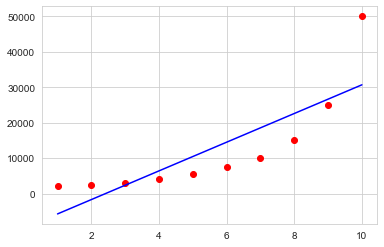

In [97]:
# visualization 1
plt.scatter(x,y,color="red")
plt.plot(x,lin_reg.predict(x),color="blue")

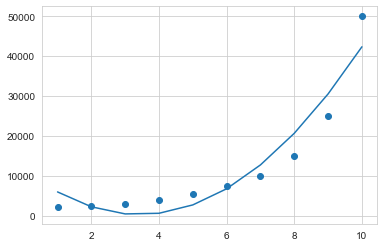

In [98]:
#visualization 2
#2. degree
plt.scatter(x,y)
plt.plot(x,lin_reg2.predict(poly_reg.fit_transform(x))) 
plt.show()

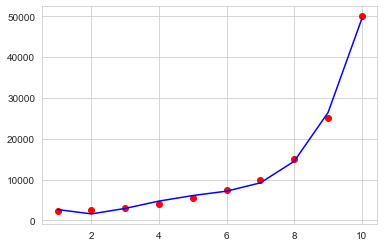

In [99]:
#visualization 3
#4. degree!
plt.scatter(x,y,color="red")
plt.plot(x,lin_reg3.predict(poly_reg3.fit_transform(x)),color="blue")
plt.show()

In [101]:
from sklearn.preprocessing import StandardScaler
sc1=StandardScaler()
X_scaled=sc1.fit_transform(x)
sc2=StandardScaler()
Y_scaled=sc2.fit_transform(y)
svr_reg = SVR(kernel = "rbf" )
svr_reg.fit(X_scaled,Y_scaled)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

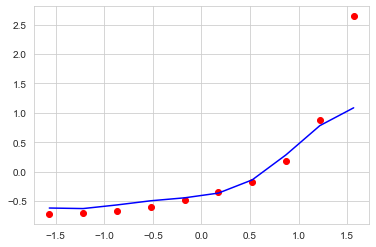

In [102]:
plt.scatter(X_scaled,Y_scaled,color="red")
plt.plot(X_scaled,svr_reg.predict(X_scaled),color="blue")

In [103]:
print(svr_reg.predict(np.array([[11]])))
print(svr_reg.predict(np.array([[6.6]])))

[0.01150915]
[0.01150915]


In [105]:
#***************----------------DecisionTree regression --------------*************

# let's see the regression with the decision tree
# no scaling needed We did scaling in SVR regression, not necessary here

r_dt=DecisionTreeRegressor(random_state=0)
r_dt.fit(x,y)

DecisionTreeRegressor(random_state=0)

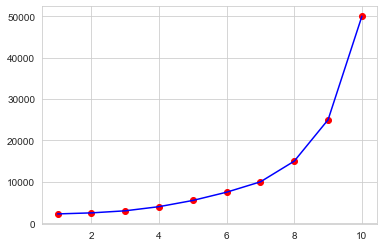

In [106]:
plt.scatter(x,y,color="red")
plt.plot(x,r_dt.predict(x),color="blue")
plt.show()

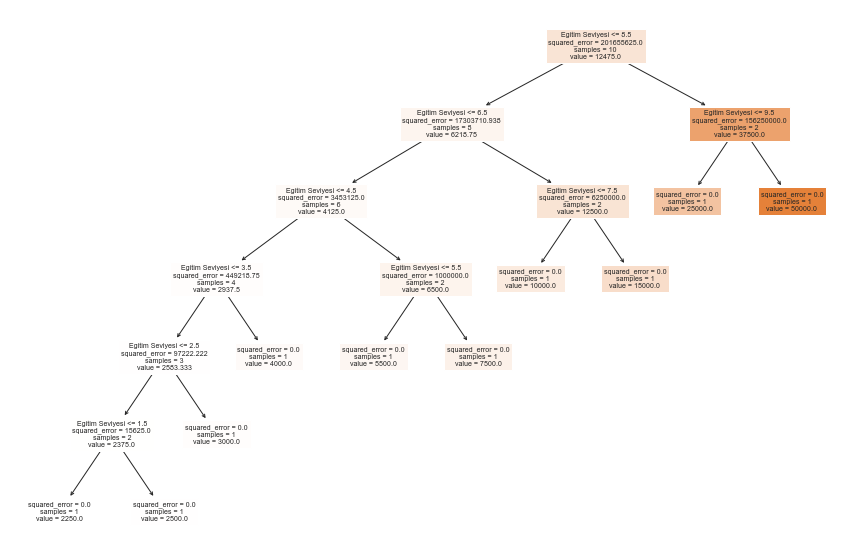

In [107]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(r_dt,feature_names=x.columns,filled=True)
plt.show()

In [108]:
print(r_dt.predict(np.array([[11]])))
print(r_dt.predict(np.array([[6.6]])))

[50000.]
[10000.]


C:\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [109]:
#***************----------------DecisionTree regression --------------*************
df = pd.read_csv("maaslar.csv")

In [111]:
#DataFrame(slice)
x=df.iloc[:,1:2] 
y=df.iloc[:,2:]
rf_reg=RandomForestRegressor(n_estimators=10,random_state=0)

In [112]:
rf_reg.fit(x,y)

<ipython-input-112-0f9548dd51ec>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(x,y)


RandomForestRegressor(n_estimators=10, random_state=0)

In [113]:
print(rf_reg.predict([[6.6]]))
# we saw a closer estimate
# decision tree was returning us full, couldn't return a middle value
# but now we got an occasional value because we did too many splits
# and was returning a common value

[10500.]


C:\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [115]:
z=x+0.5
k=x-0.4

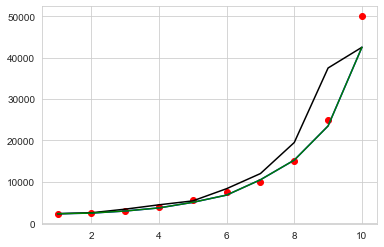

In [116]:
plt.scatter(x,y,color="red")
plt.plot(x,rf_reg.predict(x),color="blue")
plt.plot(x,rf_reg.predict(z),color="black")
plt.plot(x,rf_reg.predict(k),color="green")
# random forest is very successful in the field!!!